In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo

import numpy as np
import copy
import sys,os

sys.path.append('../src')
import utils as ut

In [26]:
cols = {}
cols['n011'] = '.5'
cols['quar'] = ut.scol['126']
cols['half'] = ut.scol['245']
cols['hal2'] = ut.scol['245']
cols['totl'] = ut.scol['585']

lss = {}
lss['n011'] = ':'
lss['quar'] = '-'
lss['half'] = '-'
lss['hal2'] = '-'
lss['totl'] = '-'

lws = {}
lws['n011'] = .5
lws['quar'] = .5
lws['half'] = .5
lws['hal2'] = 1.5
lws['totl'] = .5

ylabs = {}
ylabs['zos']     = 'SSH [m]'
ylabs['sos']     = 'SSS [g/kg]'
ylabs['tos']     = 'SST [degC]'
ylabs['so']      = 'S_300m [g/kg]'
ylabs['thetao']  = 'T_300m [degC]'
ylabs['vfxice']  = 'Ice growth/melt'
ylabs['friver']  = 'River runoff '
ylabs['calving'] = 'Calving'

plotrange = {}
plotrange['zos']     = True
plotrange['sos']     = True
plotrange['tos']     = True
plotrange['so']      = False
plotrange['thetao']  = False
plotrange['vfxice']  = True
plotrange['friver']  = True
plotrange['calving'] = True

In [59]:
regions = ['Alaska','Antarctic']#,'Global']

runs = ['quar','half','hal2','totl']
nax  = [0,1,1,2]

#vnames = ['zos','sos','tos','so','thetao','vfxice','friver','calving']
#vnames = ['zos','sos','tos','vfxice','friver','calving']
#vnames = ['zos','sos','tos','vfxice']
vnames = ['zos','so','thetao']

#Always include ctrl 
runs = np.append(['n011'],runs)
nax = np.append([1],nax)

In [60]:
mpl.rcParams['figure.figsize'] = (5*(max(nax)+1),3*len(vnames))
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['patch.edgecolor'] = 'k'
mpl.rcParams['patch.linewidth'] = .5
mpl.rcParams['figure.subplot.bottom'] = .3/len(vnames)
mpl.rcParams['figure.subplot.top'] = 1-.3/len(vnames)
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .1

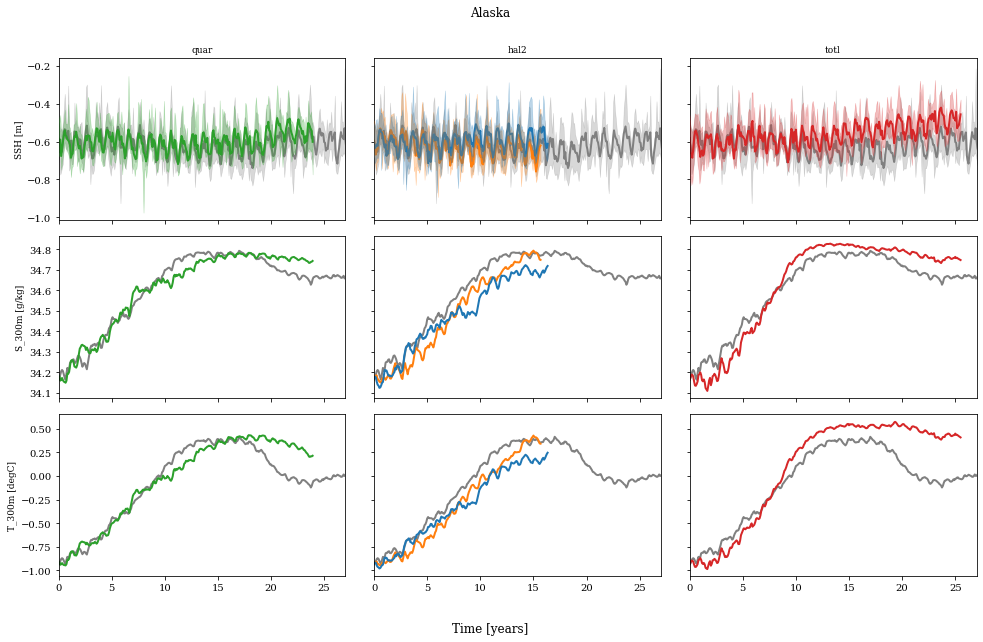

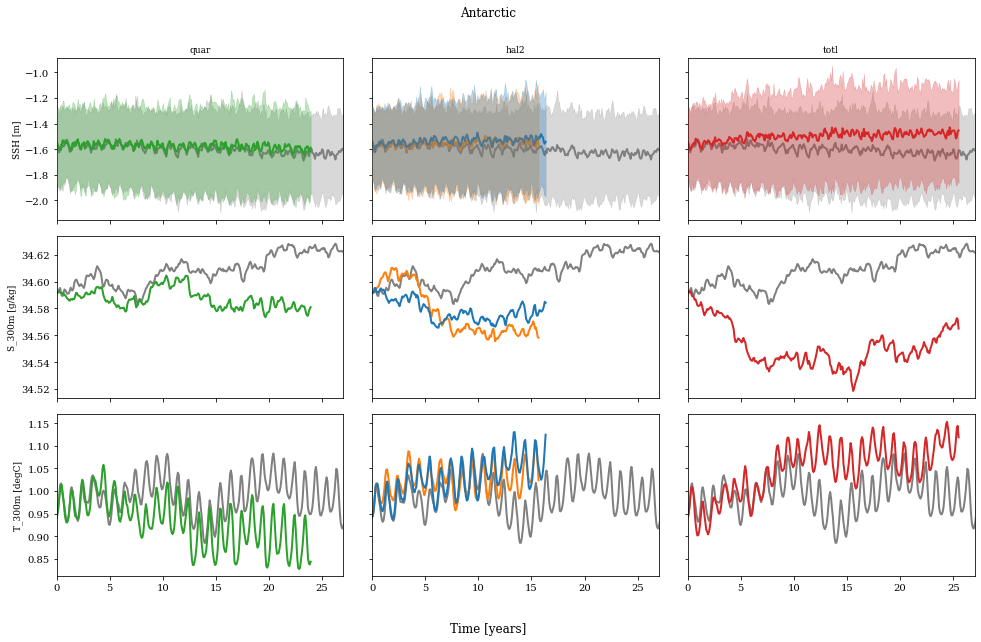

In [61]:
for region in regions:

    fig,ax = plt.subplots(len(vnames),max(nax)+1,sharex=True,sharey='row')

    for r,run in enumerate(runs):
        col = cols[run]
        for v,vname in enumerate(vnames):
            ds = xr.open_dataset(f'../data/diag_{run}_{region}_{vname}.nc')
            if run=='n011':
                for rr in range(max(nax)+1):
                    ax[v,rr].plot(ds['time'],ds['mean'],c=col)
                    if plotrange[vname] and region != 'Global':
                        ax[v,rr].fill_between(ds['time'],ds['min'],ds['max'],alpha=.3,color=col,zorder=0)
            else:        
                ax[v,nax[r]].plot(ds['time'],ds['mean'],c=col)
                if plotrange[vname] and region != 'Global':
                    ax[v,nax[r]].fill_between(ds['time'],ds['min'],ds['max'],alpha=.3,color=col,zorder=10)
                ax[0,nax[r]].set_title(run)    
            ax[v,0].set_ylabel(ylabs[vname])
            ds.close()
    #ax[0,0].set_xlim([0,17])
    ax[0,0].set_xlim([0,27])
    fig.supxlabel('Time [years]')
    fig.suptitle(region)
    plt.show()

In [39]:
regions = ['Antarctic','Alaska','Global']

runs = ['quar','half','hal2','totl']

#vnames = ['zos','so','thetao','friver','calving']
#vnames = ['zos','sos','tos','vfxice','friver','calving']
#vnames = ['zos','sos','tos','vfxice']
vnames = ['zos','so','thetao']

In [40]:
mpl.rcParams['figure.figsize'] = (5*len(regions),4*len(vnames))
mpl.rcParams['figure.subplot.bottom'] = .3/len(vnames)
mpl.rcParams['figure.subplot.top'] = 1-.3/len(vnames)
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .1

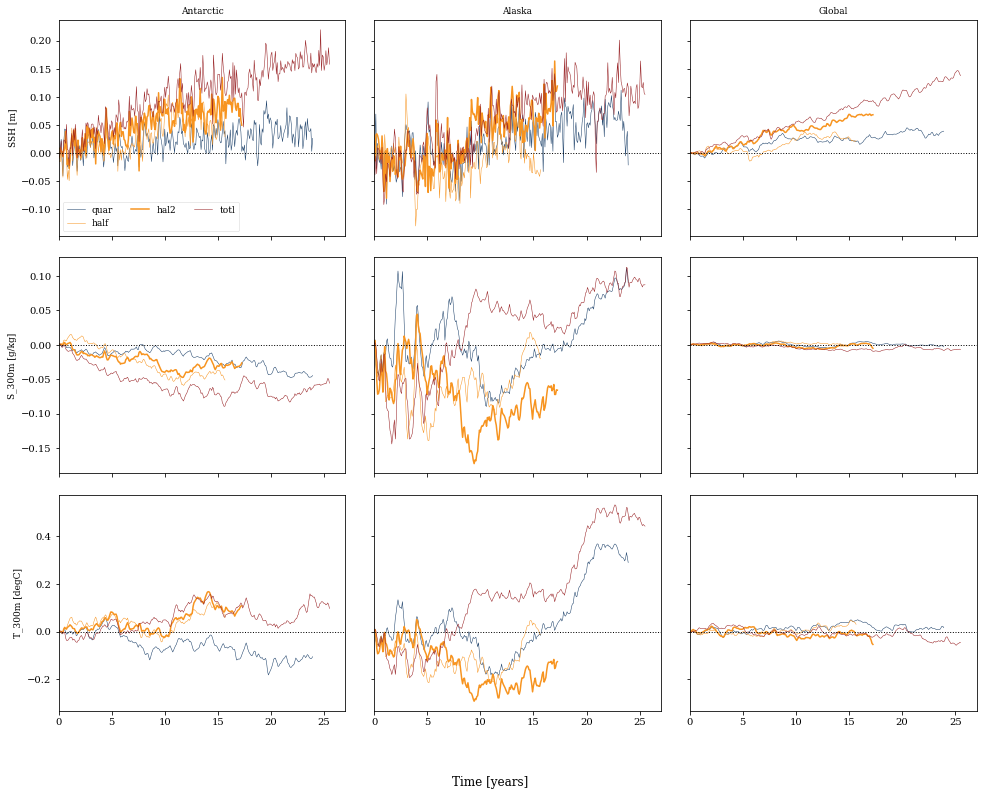

In [41]:
#Anomalies from control

fig,ax = plt.subplots(len(vnames),len(regions),sharex=True,sharey='row')

for reg,region in enumerate(regions):
    
    for v,vname in enumerate(vnames):
        ctrl = xr.open_dataset(f'../data/diag_ctrl_{region}_{vname}.nc')
        
        for r,run in enumerate(runs):
            col = cols[run]
        
            ds = xr.open_dataset(f'../data/diag_{run}_{region}_{vname}.nc')
            time = ds['time']
            var = ds['mean'] - ctrl['mean'][:len(time)]
   
            ax[v,reg].plot(time,var,c=col,ls=lss[run],lw=lws[run],label=run)   
            ax[v,0].set_ylabel(ylabs[vname])
            ds.close()
        ax[v,reg].axhline(0,0,1,ls=':',c='k')
        ctrl.close()
    ax[0,0].legend(ncol=3)
    #ax[0,0].set_xlim([0,17])
    ax[0,0].set_xlim([0,27])
    ax[0,reg].set_title(region)
fig.supxlabel('Time [years]')
plt.show()